In [71]:
import os
from PIL import Image, UnidentifiedImageError

def identify_error_images(directory):
    error_images = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            img = Image.open(file_path)
            img.verify()
        except UnidentifiedImageError:
            error_images.append(filename)
    
    return error_images

# Specify the directory path
directory = r"D:\Dataset\human_datset"

# Call the function to identify error images
error_images = identify_error_images(directory)

# Print the list of error images
print("Error images:")
for image in error_images:
    print(image)


C:\Users\Falcon\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (119989150 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\Falcon\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (92027716 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Error images:


C:\Users\Falcon\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (103343212 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19

# Set the paths to the training and validation directories
train_dir = r"D:\Dataset"
validation_dir = r"D:\Validation"

# Set the image dimensions and batch size
image_size = (224, 224)
batch_size = 36

# Create the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = True

# Add a new classifier on top of the VGG19 model
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Found 1672 images belonging to 2 classes.
Found 598 images belonging to 2 classes.
Epoch 1/20
46/46 [==============================] - 1573s 34s/step - loss: 15.4225 - accuracy: 0.5153 - val_loss: 0.6927 - val_accuracy: 0.5017
Epoch 2/20
46/46 [==============================] - 1533s 33s/step - loss: 0.6930 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5035
Epoch 3/20
46/46 [==============================] - 1586s 34s/step - loss: 0.6932 - accuracy: 0.4749 - val_loss: 0.6931 - val_accuracy: 0.5087
Epoch 4/20
46/46 [==============================] - 1526s 33s/step - loss: 0.6932 - accuracy: 0.4902 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 5/20
46/46 [==============================] - 1544s 34s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4983
Epoch 6/20
46/46 [==============================] - 1555s 34s/step - loss: 0.6932 - accuracy: 0.4914 - val_loss: 0.6931 - val_accuracy: 0.5035
Epoch 7/20
46/46 [==============================] - 1700s 

In [74]:
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
print("Class mapping:")
for key, value in class_labels.items():
    print(f"Class index: {key}, Class label: {value}")


Class mapping:
Class index: 0, Class label: Artifical_dataset
Class index: 1, Class label: human_datset


In [75]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the path to the test image
test_image_path = r"D:\Validation\human_datset\pexels-photo-10294547.jpeg"
# Load the test image
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0

# Make predictions on the test image
predictions = model.predict(test_image)
class_index = int(predictions[0][0])

# Map the predicted class index to the corresponding label
predicted_class = class_labels[class_index]

# Print the predicted class
print("Predicted Class:", predicted_class)
model.save(r"D:\model_V1_.h5")


1/1 [==============================] - 0s 174ms/step
Predicted Class: Artifical_dataset


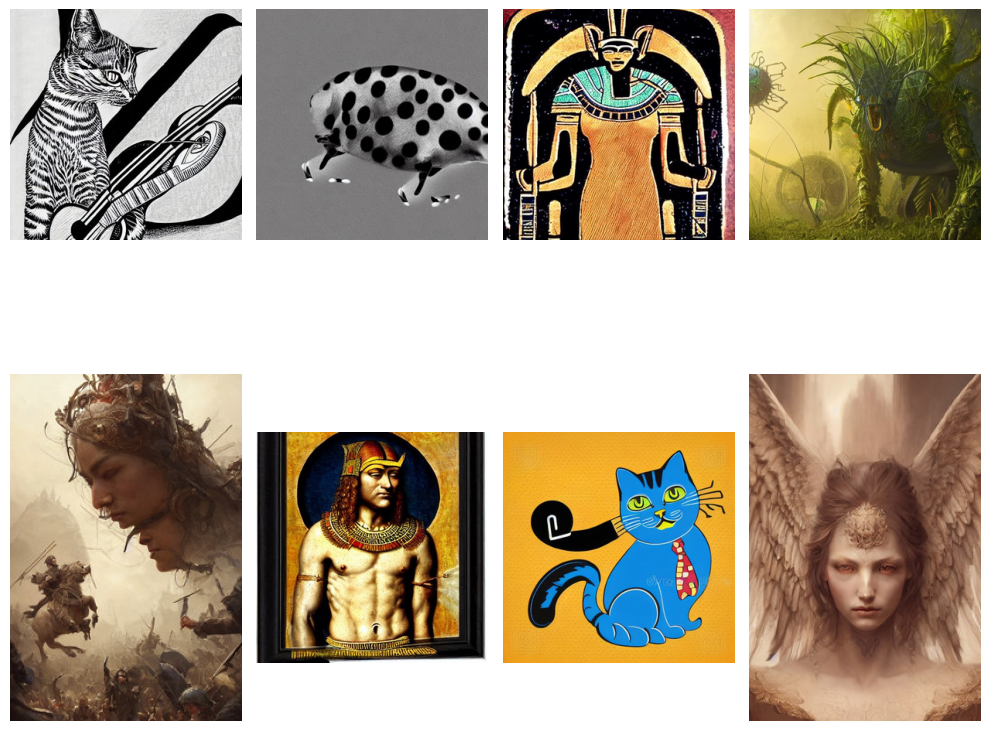

In [90]:
import matplotlib.pyplot as plt
import random
import os

# Specify the directory containing the validation images
validation_dir = r"D:\Validation\Artifical_dataset"

image_files = [os.path.join(validation_dir, file) for file in os.listdir(validation_dir)]

# Check if the number of available images is less than 8
if len(image_files) < 8:
    raise ValueError("There are fewer than 8 images in the validation directory.")

# Get a random sample of 8 image files from the validation dataset
random.seed(42)  # Set a seed for reproducibility
sample_images = random.sample(image_files, 8)

# Set the figure size and create subplots
fig, axes = plt.subplots(2, 4, figsize=(10, 10))
axes = axes.ravel()

# Load and display the sampled images
for i, image_path in enumerate(sample_images):
    img = plt.imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 50ms/step


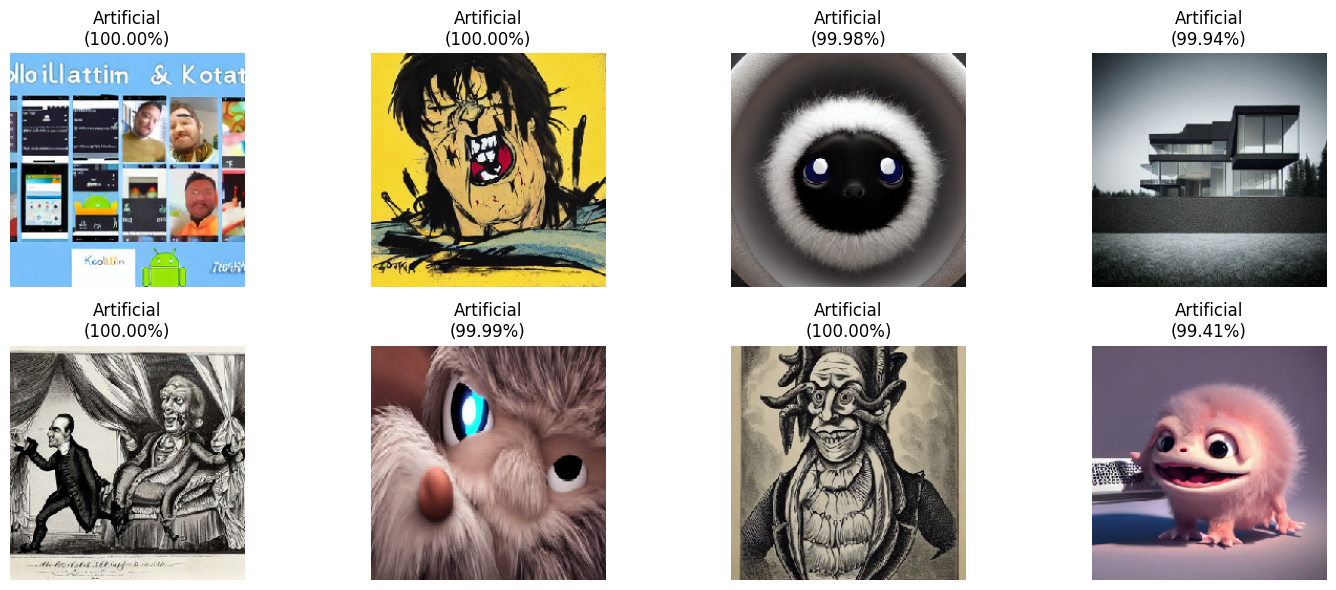

In [96]:
import matplotlib.pyplot as plt
import random
import os

# Path to the directory containing validation images
validation_dir = r"D:\Validation\Artifical_dataset"

# Get a list of image files in the validation directory
image_files = [os.path.join(validation_dir, filename) for filename in os.listdir(validation_dir) if filename.endswith((".jpg", ".jpeg", ".png"))]

# Get a random sample of 8 image files from the validation dataset
random.seed(24)  # Set a seed for reproducibility
sample_images = random.sample(image_files, 8)

# Plot the images in separate grids for each class
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.ravel()

for i, image_path in enumerate(sample_images):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    axes[i].imshow(img)
    axes[i].axis('off')

    # Get the predicted class for the image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    predicted_class = model.predict(img_array)[0][0]

    # Set the title based on the predicted class
    if predicted_class < 0.5:
        class_label = 'Artificial'
        percentage = (1 - predicted_class) * 100
    else:
        class_label = 'Human'
        percentage = predicted_class * 100

    axes[i].set_title(f'{class_label}\n({percentage:.2f}%)')

plt.tight_layout()
plt.show()


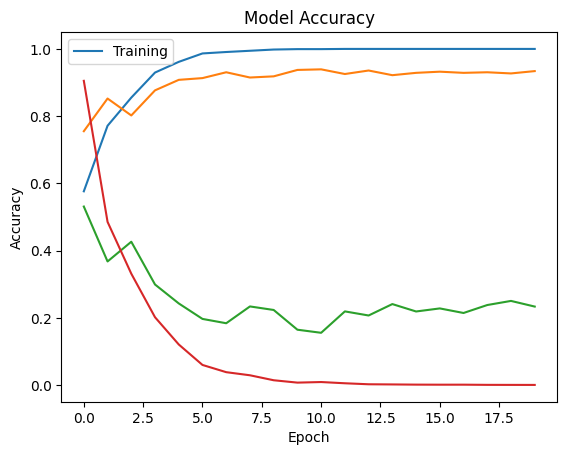

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Function to handle image upload
def handle_image_upload(change):
    if change['type'] == 'change' and change['name'] == 'value':
        image = Image.open(io.BytesIO(change['new'][0]['content']))

        # Preprocess the image
        img_width, img_height = 224, 224
        image = image.resize((img_width, img_height))
        image_array = np.array(image) / 255.0
        image_array = np.expand_dims(image_array, axis=0)

        # Predict the class of the image
        prediction = model.predict(image_array)[0][0]

        # Plot the image and show the predicted class
        plt.imshow(image)
        plt.axis('off')
        if prediction < 0.5:
            plt.title('Artificial')
        else:
            plt.title('Human')
        plt.show()

# Create the file upload widget
upload_button = widgets.FileUpload(accept='image/*')
upload_button.observe(handle_image_upload)

# Display the file upload widget
display(upload_button)


In [ ]:
import io
from PIL import Image
import numpy as np
from flask import Flask, request, jsonify
import tensorflow as tf

app = Flask(__name__)

# Load your trained model
model = tf.keras.models.load_model(r"D:\model_V1_.h5")

# Define the API endpoint
@app.route('/predict', methods=['POST'])
def predict():
    # Get the uploaded image from the request
    file = request.files['file']
    image = Image.open(io.BytesIO(file.read()))

    # Preprocess the image
    img_width, img_height = 224, 224
    image = image.resize((img_width, img_height))
    image = image.convert('RGB')  # Convert to RGB format
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Predict the class of the image
    prediction = model.predict(image_array)[0][0]

    # Return the predicted class as a response
    if prediction < 0.5:
        result = {'class': 'Artificial'}
    else:
        result = {'class': 'Human'}

    return jsonify(result)

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


1/1 [==============================] - 0s 377ms/step


127.0.0.1 - - [03/Jul/2023 11:15:14] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 32ms/step


127.0.0.1 - - [03/Jul/2023 11:15:31] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 33ms/step


127.0.0.1 - - [03/Jul/2023 11:23:51] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 31ms/step


127.0.0.1 - - [03/Jul/2023 11:24:53] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 30ms/step


127.0.0.1 - - [03/Jul/2023 11:25:03] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 35ms/step


127.0.0.1 - - [03/Jul/2023 11:27:30] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 70ms/step


127.0.0.1 - - [03/Jul/2023 11:28:52] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 32ms/step


127.0.0.1 - - [03/Jul/2023 11:29:39] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 35ms/step


127.0.0.1 - - [03/Jul/2023 11:31:40] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 48ms/step


127.0.0.1 - - [03/Jul/2023 11:33:51] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 29ms/step


127.0.0.1 - - [03/Jul/2023 11:34:00] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 28ms/step


127.0.0.1 - - [03/Jul/2023 11:34:02] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 30ms/step


127.0.0.1 - - [03/Jul/2023 11:35:43] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 29ms/step


127.0.0.1 - - [03/Jul/2023 11:38:12] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 31ms/step


127.0.0.1 - - [03/Jul/2023 11:39:23] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 32ms/step


127.0.0.1 - - [03/Jul/2023 11:43:09] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 29ms/step


127.0.0.1 - - [03/Jul/2023 11:43:47] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 30ms/step


127.0.0.1 - - [03/Jul/2023 11:43:56] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 34ms/step


127.0.0.1 - - [03/Jul/2023 11:45:37] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 32ms/step


127.0.0.1 - - [03/Jul/2023 11:47:36] "POST /predict HTTP/1.1" 200 -
